### BMI 500 - HW2
##### Wenjing Ma (wenjing.ma@emory.edu)

#### Problem 1

In [49]:
import numpy as np
import matplotlib.pyplot as plt

## Note: It seems that the Leibnis formula given in the homework should start from k=0
## Thus in this homework, I wrote it with the starting index as 0

## This function came to my mind first when I saw the problem 
## although it is the same as problem2a.
def Leibnis_func(n):
    Leibnis_res = 0 # initialize the result
    for i in range(n): 
        if i % 2 == 0: # if even index (0, 2, 4, ..etc), add
            Leibnis_res += 1/(2*i+1)
        else: # if odd, substract
            Leibnis_res -= 1/(2*i+1)
    return Leibnis_res

#### Problem 2

In [33]:
## a. for-loop and if-statement with %
def Leibnis_func_a(n):
    Leibnis_res = 0 # initialize the result
    for i in range(n): 
        if i % 2 == 0: # if even index (0, 2, 4, ..etc), add
            Leibnis_res += 1/(2*i+1)
        else: # if odd, substract
            Leibnis_res -= 1/(2*i+1)
    return Leibnis_res

In [34]:
## b. for-loop woth quantity (-1)**n
def Leibnis_func_b(n):
    Leibnis_res = 0 # initialize the result
    for i in range(n):
        Leibnis_res += ((-1)**i)/(2*i+1)
    return Leibnis_res

In [35]:
## c. construct list
def Leibnis_func_c(n):
    # for-loop in list
    Leibnis_list = [((-1)**i)/(2*i+1) for i in range(n)] 
    return sum(Leibnis_list) # return sum

In [36]:
## d. construct set
def Leibnis_func_d(n):
    # for-loop in set
    Leibnis_set = {((-1)**i)/(2*i+1) for i in range(n)}
    return sum(Leibnis_set) # return sum

In [37]:
## e. construct dictrionary
def Leibnis_func_e(n):
    # for-loop in dictionary
    Leibnis_dict = {i:((-1)**i)/(2*i+1) for i in range(n)}
    return sum(Leibnis_dict.values())

In [38]:
## f. construct NumPy array
def Leibnis_func_f(n):
    # for-loop in NumPy array
    Leibnis_array = np.array([((-1)**i)/(2*i+1) for i in range(n)])
    return np.sum(Leibnis_array)

In [39]:
## g. construct NumPy array with indexing
def Leibnis_func_g(n):
    # for-loop in NumPy array
    Leibnis_array = np.array([((-1)**i)/(2*i+1) for i in range(n)])
    pos = np.sum(Leibnis_array[::2]) # add up positives
    neg = np.sum(Leibnis_array[1::2]) # add up negatives
    return pos+neg

In [40]:
## j. Combine terms
def Leibnis_func_j(n):
    Leibnis_sum = 0
    i = 0
    ## make sure the combined terms are together
    while i + 1 < n:
        Leibnis_sum += (1/(2*i+1) - 1/(2*i+3)) # add up combined terms
        i += 2 # next combination

    ## if odd, then add the last term back
    if n % 2 == 1:
        Leibnis_sum += 1/(2*i+1)
    return Leibnis_sum

#### Problem 3
Let's use **n as 1000** to do the math.

In [45]:
## Assess accuracy first
n = 1000
golden = np.pi
print("Function a:", abs(4*Leibnis_func_a(n=n)-golden))
print("Function b:", abs(4*Leibnis_func_b(n=n)-golden))
print("Function c:", abs(4*Leibnis_func_c(n=n)-golden))
print("Function d:", abs(4*Leibnis_func_d(n=n)-golden))
print("Function e:", abs(4*Leibnis_func_e(n=n)-golden))
print("Function f:", abs(4*Leibnis_func_f(n=n)-golden))
print("Function g:", abs(4*Leibnis_func_g(n=n)-golden))
print("Function j:", abs(4*Leibnis_func_j(n=n)-golden))

Function a: 0.000999999749998981
Function b: 0.000999999749998981
Function c: 0.000999999749998981
Function d: 0.0009999997499949842
Function e: 0.000999999749998981
Function f: 0.0009999997500012014
Function g: 0.0009999997500029778
Function j: 0.0009999997500029778


According to the result, it seems that function d has the least difference with the `np.pi` result, which used the Python set. 

In [47]:
## Assess speed then
%timeit Leibnis_func_a(n=n)
%timeit Leibnis_func_b(n=n)
%timeit Leibnis_func_c(n=n)
%timeit Leibnis_func_d(n=n)
%timeit Leibnis_func_e(n=n)
%timeit Leibnis_func_f(n=n)
%timeit Leibnis_func_g(n=n)
%timeit Leibnis_func_j(n=n)

181 µs ± 9.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
415 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
423 µs ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
457 µs ± 3.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
451 µs ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
468 µs ± 35.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
476 µs ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
156 µs ± 9.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


According to the result, it seems that `a` and `j` are having more loops than others, which makes the result slow. In the contrast, `b` using for-loop along with quantity `(-1)**n` seem to be the fastest.

As a combination, I may use `function c` to calculate pi because the overal speed is faster and it has clear and neat code. Although it seems less accurate than `function d`, it is still close enough for calculating pi.

#### Problem 4

In [63]:
## calculate the errors for 10,000 points
errors = [abs(4*Leibnis_func_c(i)-np.pi) for i in range(1, 10000)]

Text(0, 0.5, 'Absolute Errors')

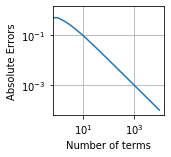

In [64]:
# start plotting
plt.figure(figsize = (2, 2))
plt.plot(errors)
plt.xscale('log',basex=10) 
plt.yscale('log',basey=10)
plt.grid(True)
plt.xlabel("Number of terms")
plt.ylabel("Absolute Errors")

#### Problem 5
I may want to generate two column vectors and use the inner product to calculate the sum. One of them stores the value, and the other stores the sign. Because Matlab stored data in a column-wise way.